In [0]:
import pandas as pd
import seaborn as sns

In [90]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


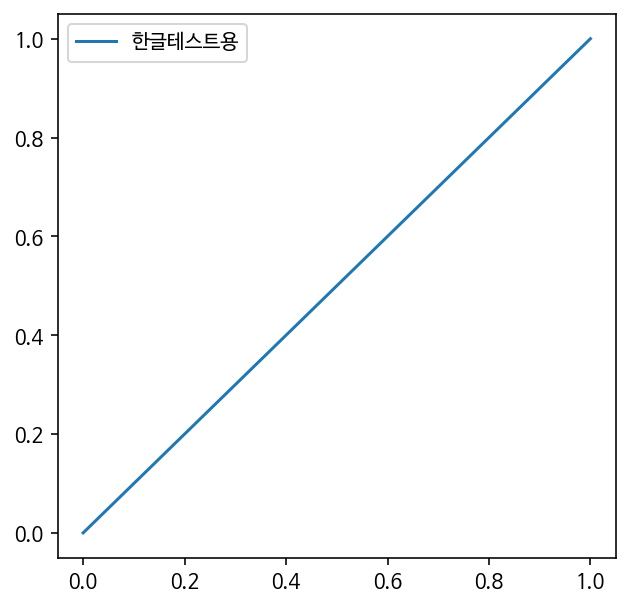

In [91]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

# Explain Data

In [0]:
train = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/train.json', typ = 'frame')
val = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/val.json', typ = 'frame')
test = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/test.json', typ = 'frame')
song_meta = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/song_meta.json', typ = 'frame')
genre_gn_all = pd.read_json('/content/drive/My Drive/Colab Notebooks/data/멜론/genre_gn_all.json', typ = 'series')

In [93]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000


모델 학습용 파일로, 115,071개 플레이리스트의 원본 데이터가 수록

- id: 플레이리스트 ID
- plylst_title: 플레이리스트 제목
- tags: 태그 리스트
- songs: 곡 리스트
- like_cnt: 좋아요 개수
- updt_date: 수정 날짜


In [94]:
val.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[],118598,,"[373313, 151080, 275346, 696876, 165237, 52593...",1675,2019-05-27 14:14:33.000
1,[],131447,앨리스테이블,[],1,2014-07-16 15:24:24.000
2,[],51464,,"[529437, 516103, 360067, 705713, 226062, 37089...",62,2008-06-21 23:26:22.000
3,[],45144,,"[589668, 21711, 570151, 320043, 13930, 599327,...",20,2017-10-30 18:15:43.000
4,[],79929,,"[672718, 121924, 102694, 683657, 201558, 38511...",20,2017-02-07 11:40:42.000


공개 리더보드용 문제 파일로, 23,015개 플레이리스트에 대한 문제가 수록되어 있습니다. 모든 데이터가 수록되어있는 train 파일과는 다르게, 곡과 태그의 일부가 수록

- id: 플레이리스트 ID
- plylst_title: 플레이리스트 제목
- tags: 태그 리스트
- songs: 곡 리스트
- like_cnt: 좋아요 개수
- updt_date: 수정 날짜

In [95]:
test.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000


파이널 리더보드용 문제 파일로, 10,740개 플레이리스트에 대한 문제가 수록되어 있습니다. 모든 데이터가 수록되어있는 train 파일과는 다르게, 곡과 태그의 일부가 수록

- id: 플레이리스트 ID
- plylst_title: 플레이리스트 제목
- tags: 태그 리스트
- songs: 곡 리스트
- like_cnt: 좋아요 개수
- updt_date: 수정 날짜

In [96]:
test[test['plylst_title'] != '']

,tags,id,plylst_title,songs,like_cnt,updt_date
5,[스트레스],88862,노래방 안에서,[],22,2016-01-22 20:55:12.000
7,[사랑],133975,봄바람과 듣고싶은 설레는 노래,[],0,2020-02-19 03:05:49.000
11,"[재즈, 기분전환, 뉴에이지]",135323,책읽으며 듣기좋은 잔잔 BGM♪,[],29,2017-06-13 09:46:27.000
17,[],43130,한여름의 센티멘탈 피아노.,[],4,2014-06-04 01:22:05.000
21,[새벽],113806,매력있고 편안한 노래들입니다!♬,[],2,2014-12-13 10:23:21.000
...,...,...,...,...,...,...
10707,[추억],27982,당신이 모르고 지나쳤을 수도 있는 명곡,[],11,2018-05-17 02:53:34.000
10709,[사랑],123364,달달하고 꽁냥스러운 염장송 (염장질에 천불주의),[],13,2016-11-08 10:33:32.000
10712,[기분전환],61817,피곤함을 달래줄 음악과 함께 하루의 피로를 풀자,[],0,2015-09-03 16:36:35.000
10720,[],59912,프랑스를 대표하는 일렉트로니카 아티스트,[],362,2010-01-08 14:53:06.000


**테스트 데이터에는 playlist의 title이 많이  존재하지 않는다. train 데이터의 plyst_title을 이용할 수 있을지 의문이다.**
-  제목이 있는 경우도 있긴함. 

In [97]:
song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


 모든 곡에 대한 메타데이터가 포함

- id: 곡 ID
- album_id: 앨범 ID
- artist_id_basket: 아티스트 ID 리스트
- artist_name_basket: 아티스트 리스트
- song_name: 곡 제목
- song_gn_gnr_basket: 곡 장르 리스트
- song_gn_dtl_gnr_basket: 곡 세부 장르 리스트
- issue_date: 발매일

In [98]:
genre_gn_all

GN0100       발라드
GN0101    세부장르전체
GN0102       '80
GN0103       '90
GN0104       '00
           ...  
GN2900       뮤지컬
GN2901    세부장르전체
GN2902     국내뮤지컬
GN2903     국외뮤지컬
GN3000     크리스마스
Length: 254, dtype: object

---

In [99]:
# example
train[train['like_cnt'] == 53211]

,tags,id,plylst_title,songs,like_cnt,updt_date
46524,"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]",74220,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[159317, 368264, 600999, 274905, 643023, 24070...",53211,2020-04-17 14:32:23.000


---

---



# EDA

고려해야할? 것들
1. 년도별(계절도 고려하는 것이 좋을 것 같음)로 장르별로 많이 뽑히는 노래 탑 100개? 씩만 뽑아보면 좋을 것 같음.
2. 업데이트 시간 자체가 곡을 넣고 최종 저장 순간일텐데 시간에 따라 "갬성"이 쫌다르지 않을까?
3. Tag별로 많이 뽑히는 곡들 모아보자.

###변수제작

In [0]:
for data in [train,val,test]:
  data['년도'] = data['updt_date'].apply(lambda x: x[:4])  
  data['월'] = data['updt_date'].apply(lambda x: x[5:7])
  data['시간대'] = data['updt_date'].apply(lambda x:x[11:13])

In [101]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,년도,월,시간대
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,2013,12,18
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,2014,12,16
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,2017,08,07
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,2019,12,15
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,2011,10,13


In [102]:
val.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,년도,월,시간대
0,[],118598,,"[373313, 151080, 275346, 696876, 165237, 52593...",1675,2019-05-27 14:14:33.000,2019,05,14
1,[],131447,앨리스테이블,[],1,2014-07-16 15:24:24.000,2014,07,15
2,[],51464,,"[529437, 516103, 360067, 705713, 226062, 37089...",62,2008-06-21 23:26:22.000,2008,06,23
3,[],45144,,"[589668, 21711, 570151, 320043, 13930, 599327,...",20,2017-10-30 18:15:43.000,2017,10,18
4,[],79929,,"[672718, 121924, 102694, 683657, 201558, 38511...",20,2017-02-07 11:40:42.000,2017,02,11


In [103]:
test.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,년도,월,시간대
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000,2012,09,01
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000,2019,12,14
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000,2015,05,10
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000,2019,03,09
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000,2018,07,16


## 년도별 변수 관리

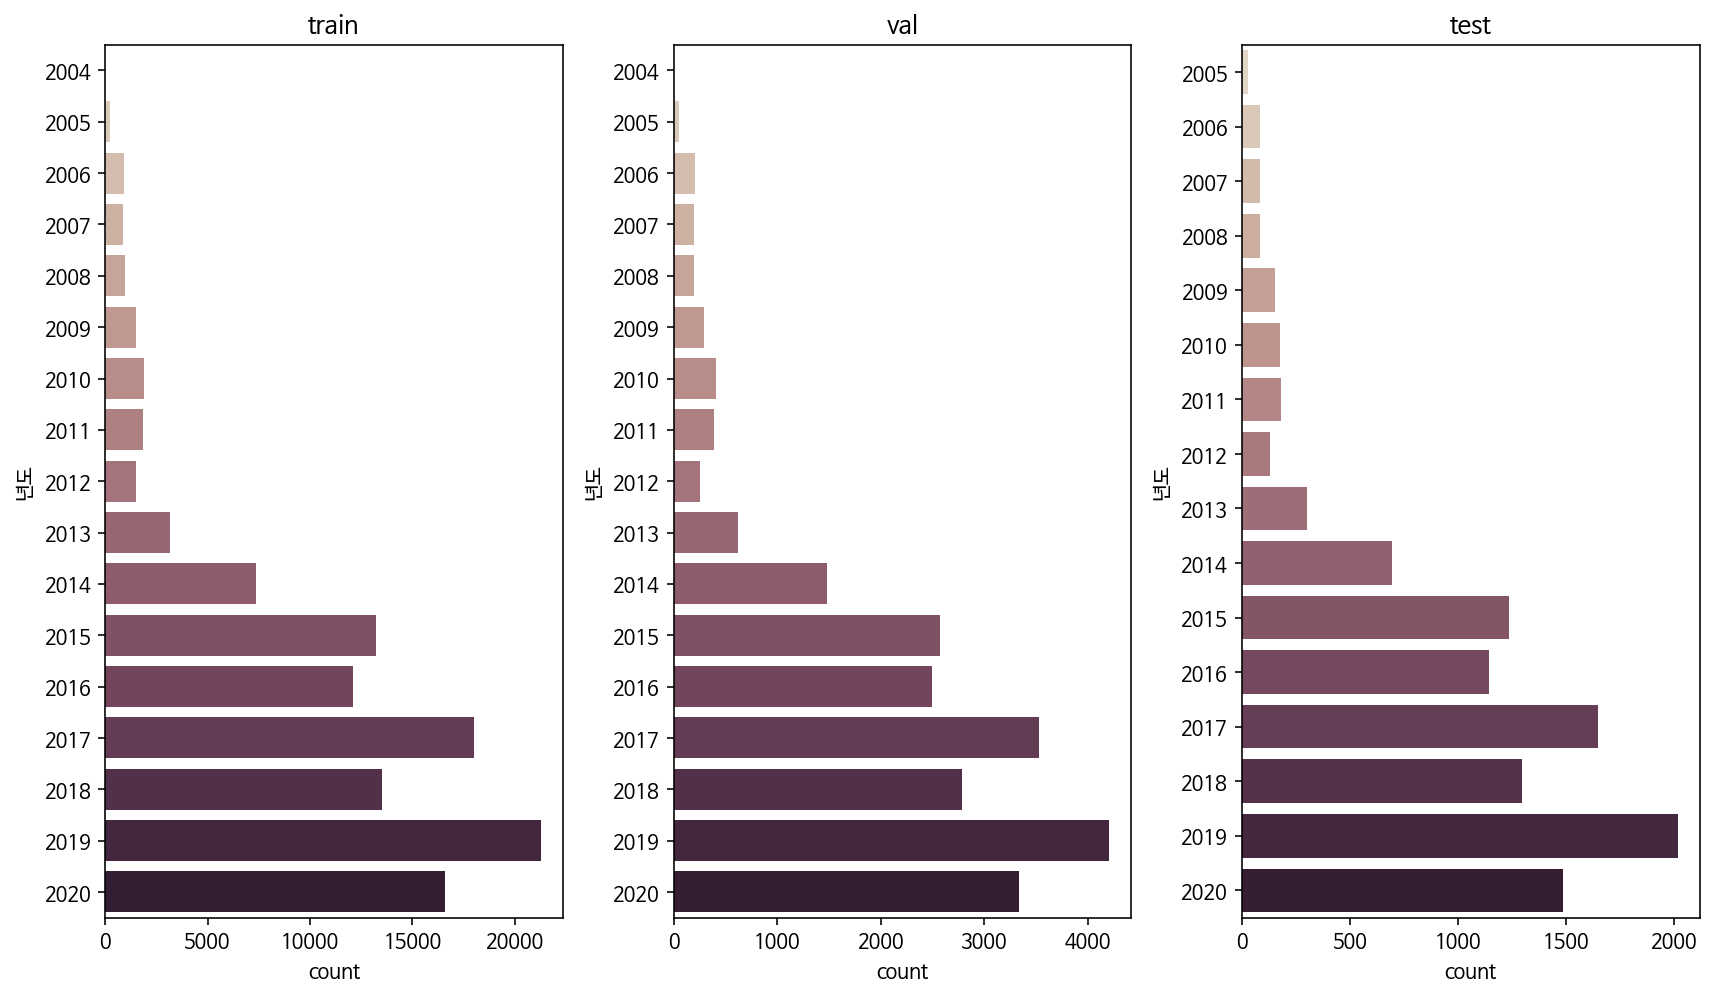

In [105]:
fig,((ax1,ax2,ax3))= plt.subplots(nrows=1,ncols=3, figsize = (12,7))
sns.countplot(y="년도", palette="ch:.25", data=train,ax=ax1)
sns.countplot(y="년도", palette="ch:.25", data=val,ax=ax2)
sns.countplot(y="년도", palette="ch:.25", data=test,ax=ax3)

ax1.set_title('train')
ax2.set_title('val')
ax3.set_title('test')

plt.tight_layout()
plt.show()

train,val, test 모두 2019년이 playlist중에 가장 많은 비중을 차지함.

In [106]:
# 년도별 tags 평균 개수
y_list=[]
mean_list=[]
graph_dict={}
for k in train['년도'].unique():
  #print('년도:',k,train[train['년도']== k]['tags'].apply(lambda x: len(x)).reset_index()['tags'].mean())
  y_list.append(k)
  mean_list.append(train[train['년도']== k]['tags'].apply(lambda x: len(x)).reset_index()['tags'].mean())

graph_dict['년도'] = y_list
graph_dict['tags_mean'] = mean_list
mean_tr_y = pd.DataFrame(graph_dict).sort_values('년도')
mean_tr_y.head()

,년도,tags_mean
16,2004,1.200000
15,2005,1.262500
12,2006,1.344865
10,2007,1.335991
6,2008,1.256384


In [107]:
# 년도별 tags 평균 개수
y_list=[]
mean_list=[]
graph_dict={}
for k in train['년도'].unique():
  #print('년도:',k,train[train['년도']== k]['tags'].apply(lambda x: len(x)).reset_index()['tags'].mean())
  y_list.append(k)
  mean_list.append(train[train['년도']== k]['tags'].apply(lambda x: len(x)).reset_index()['tags'].mean())

graph_dict['년도'] = y_list
graph_dict['tags_mean'] = mean_list
mean_val_y = pd.DataFrame(graph_dict).sort_values('년도')
mean_val_y.head()

,년도,tags_mean
16,2004,1.200000
15,2005,1.262500
12,2006,1.344865
10,2007,1.335991
6,2008,1.256384


In [108]:
y_list=[]
mean_list=[]
graph_dict={}
for k in test['년도'].unique():
  #print('년도:',k,train[train['년도']== k]['tags'].apply(lambda x: len(x)).reset_index()['tags'].mean())
  y_list.append(k)
  mean_list.append(test[test['년도']== k]['tags'].apply(lambda x: len(x)).reset_index()['tags'].mean())

graph_dict['년도'] = y_list
graph_dict['tags_mean'] = mean_list
mean_ts_y = pd.DataFrame(graph_dict).sort_values('년도')
mean_ts_y.head()

,년도,tags_mean
15,2005,0.000000
14,2006,0.154762
12,2007,0.222222
11,2008,0.273810
13,2009,0.086093


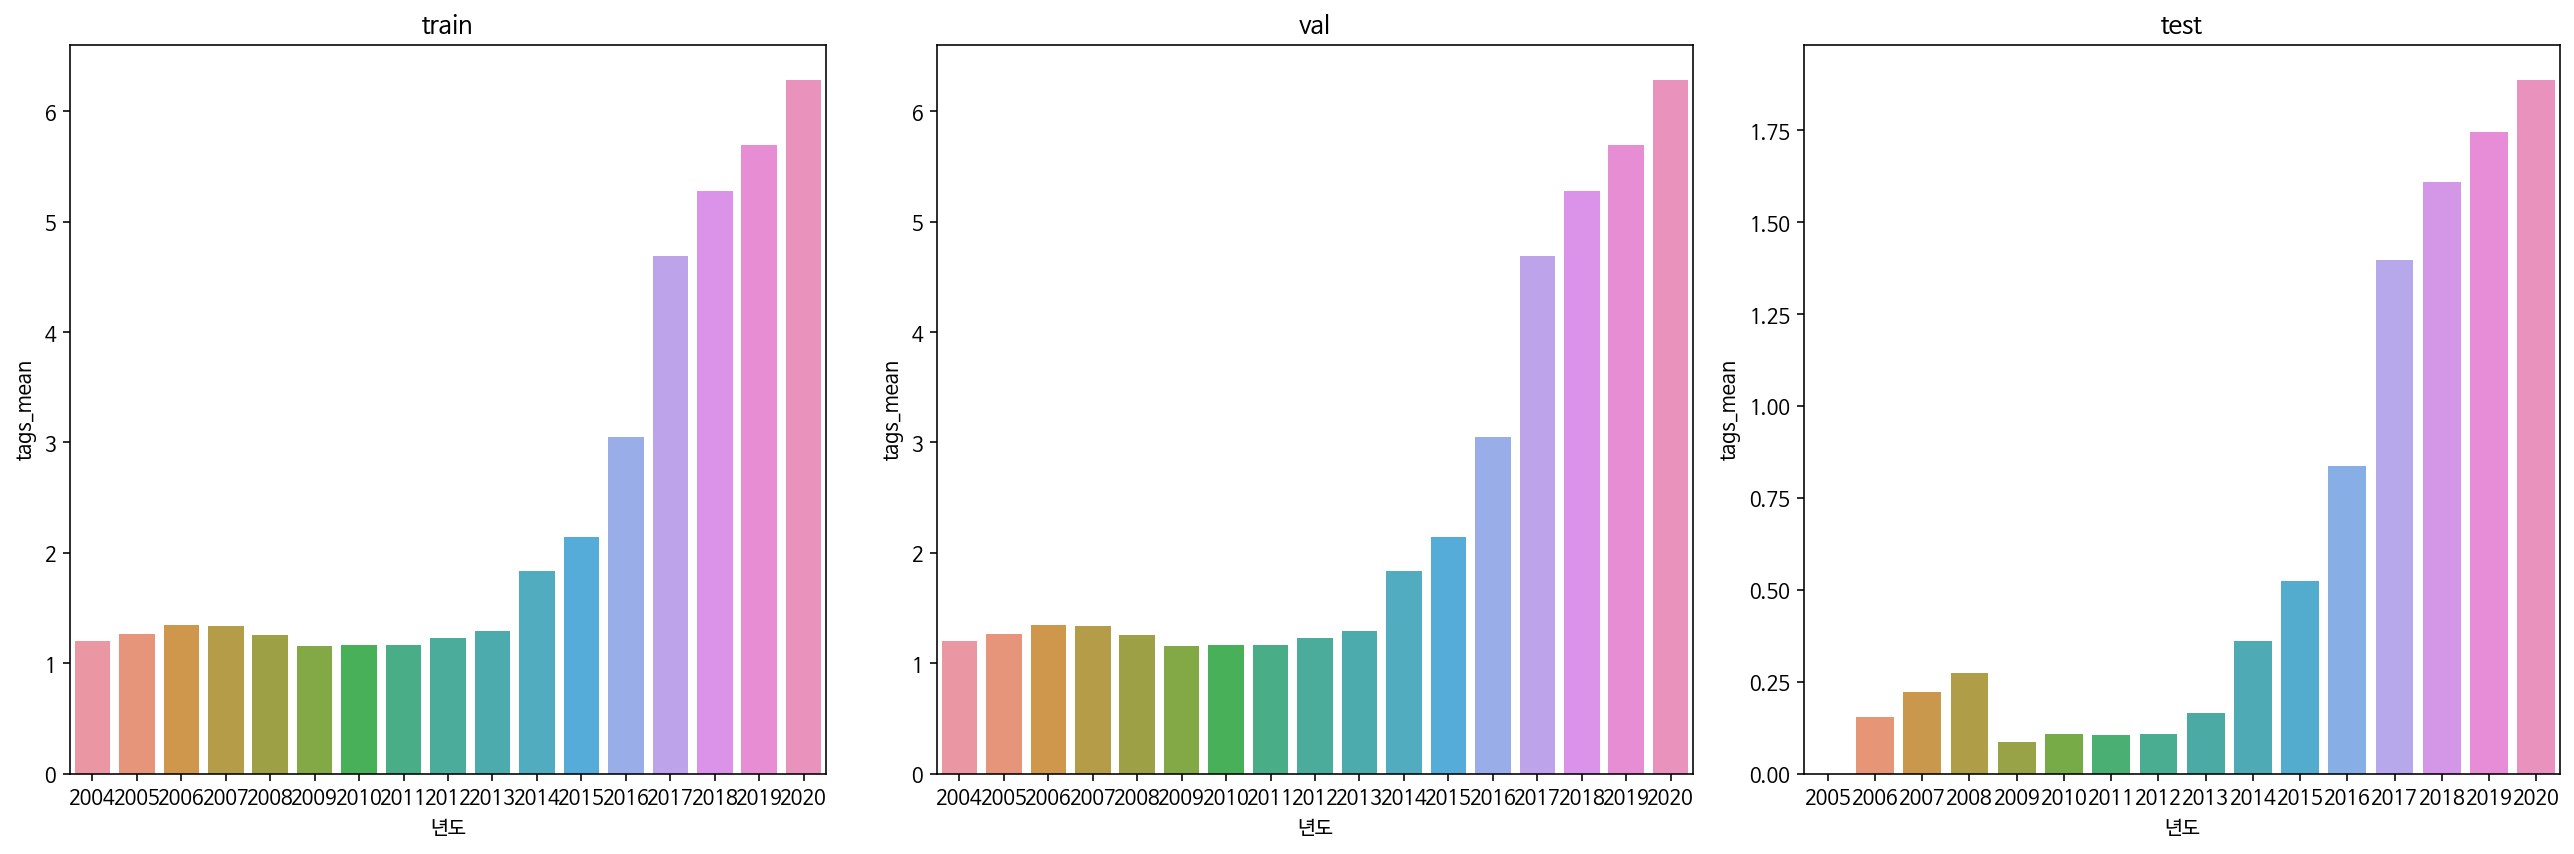

In [112]:
fig,((ax1,ax2,ax3))= plt.subplots(nrows=1,ncols=3, figsize = (18,6))
sns.barplot('년도','tags_mean',data=mean_tr_y,ax=ax1)
sns.barplot('년도','tags_mean',data=mean_val_y,ax=ax2)
sns.barplot('년도','tags_mean',data=mean_ts_y,ax=ax3)

ax1.set_title('train')
ax2.set_title('val')
ax3.set_title('test')

plt.tight_layout()
plt.show()

**또한 Tag의 분포를 보면 2016년 기점으로 tag의 개수가 급격하게 변한 것으로 보임**



In [110]:
# 년도별 tags 최소값 개수
for k in train['년도'].unique():
  print('년도:',k,train[train['년도']== k]['tags'].apply(lambda x: len(x)).reset_index()['tags'].min())

년도: 2013 1
년도: 2014 1
년도: 2017 1
년도: 2019 1
년도: 2011 1
년도: 2016 1
년도: 2008 1
년도: 2020 1
년도: 2018 1
년도: 2015 1
년도: 2007 1
년도: 2012 1
년도: 2006 1
년도: 2010 1
년도: 2009 1
년도: 2005 1
년도: 2004 1


tag의 개수는 모두 최소 1개씩은 가지고 있는 것으로 보임.

## 월별 변수관리

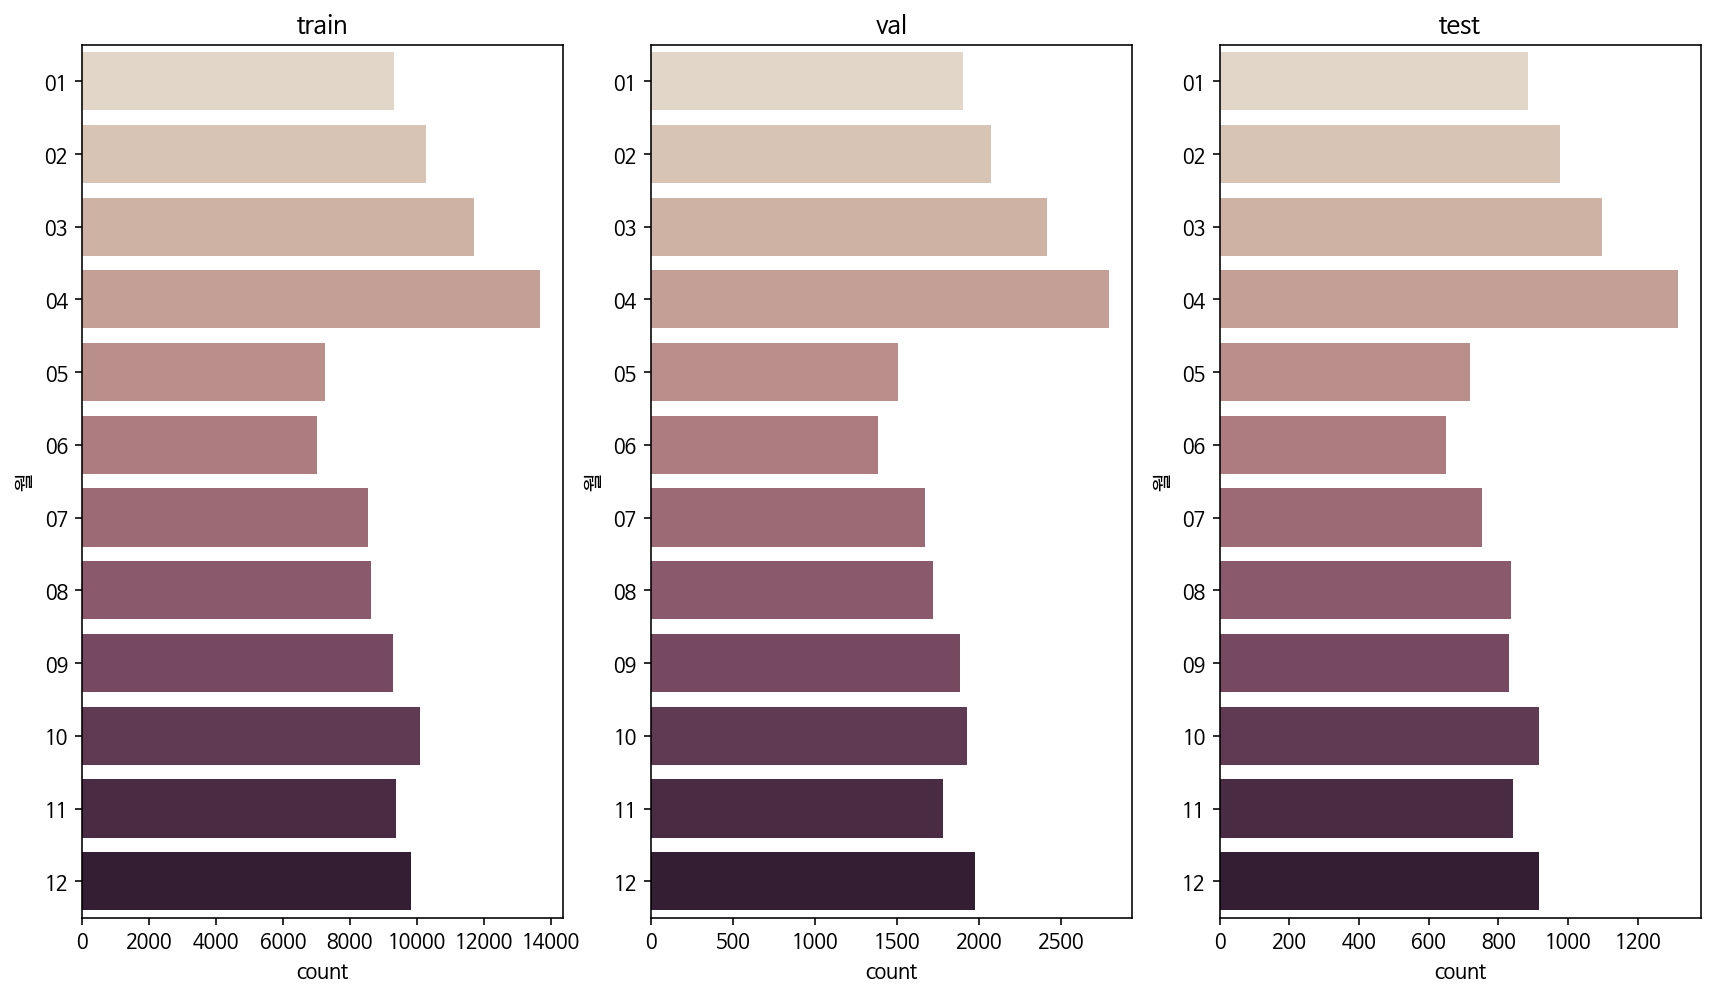

In [113]:
fig,((ax1,ax2,ax3))= plt.subplots(nrows=1,ncols=3, figsize = (12,7))
sns.countplot(y="월", palette="ch:.25", data=train,ax=ax1)
sns.countplot(y="월", palette="ch:.25", data=val,ax=ax2)
sns.countplot(y="월", palette="ch:.25", data=test,ax=ax3)

ax1.set_title('train')
ax2.set_title('val')
ax3.set_title('test')

plt.tight_layout()
plt.show()

playlist는 4월에 많이 업데이트가 되는 것으로 보임.

In [0]:
# 년도별 tags 평균 개수
y_list=[]
mean_list=[]
graph_dict={}
for data in [train,val,test]:
  for k in data['월'].unique():
    #print('년도:',k,train[train['년도']== k]['tags'].apply(lambda x: len(x)).reset_index()['tags'].mean())
    y_list.append(k)
    mean_list.append(train[train['월']== k]['tags'].apply(lambda x: len(x)).reset_index()['tags'].mean())

  graph_dict['월'] = y_list
  graph_dict['tags_mean'] = mean_list
  if [x for x in globals() if globals()[x] is data][0] == 'train':
    mean_train_m = pd.DataFrame(graph_dict).sort_values('월')
  elif [x for x in globals() if globals()[x] is data][0] == 'val':
    mean_val_m = pd.DataFrame(graph_dict).sort_values('월')
  else:
    mean_test_m = pd.DataFrame(graph_dict).sort_values('월')

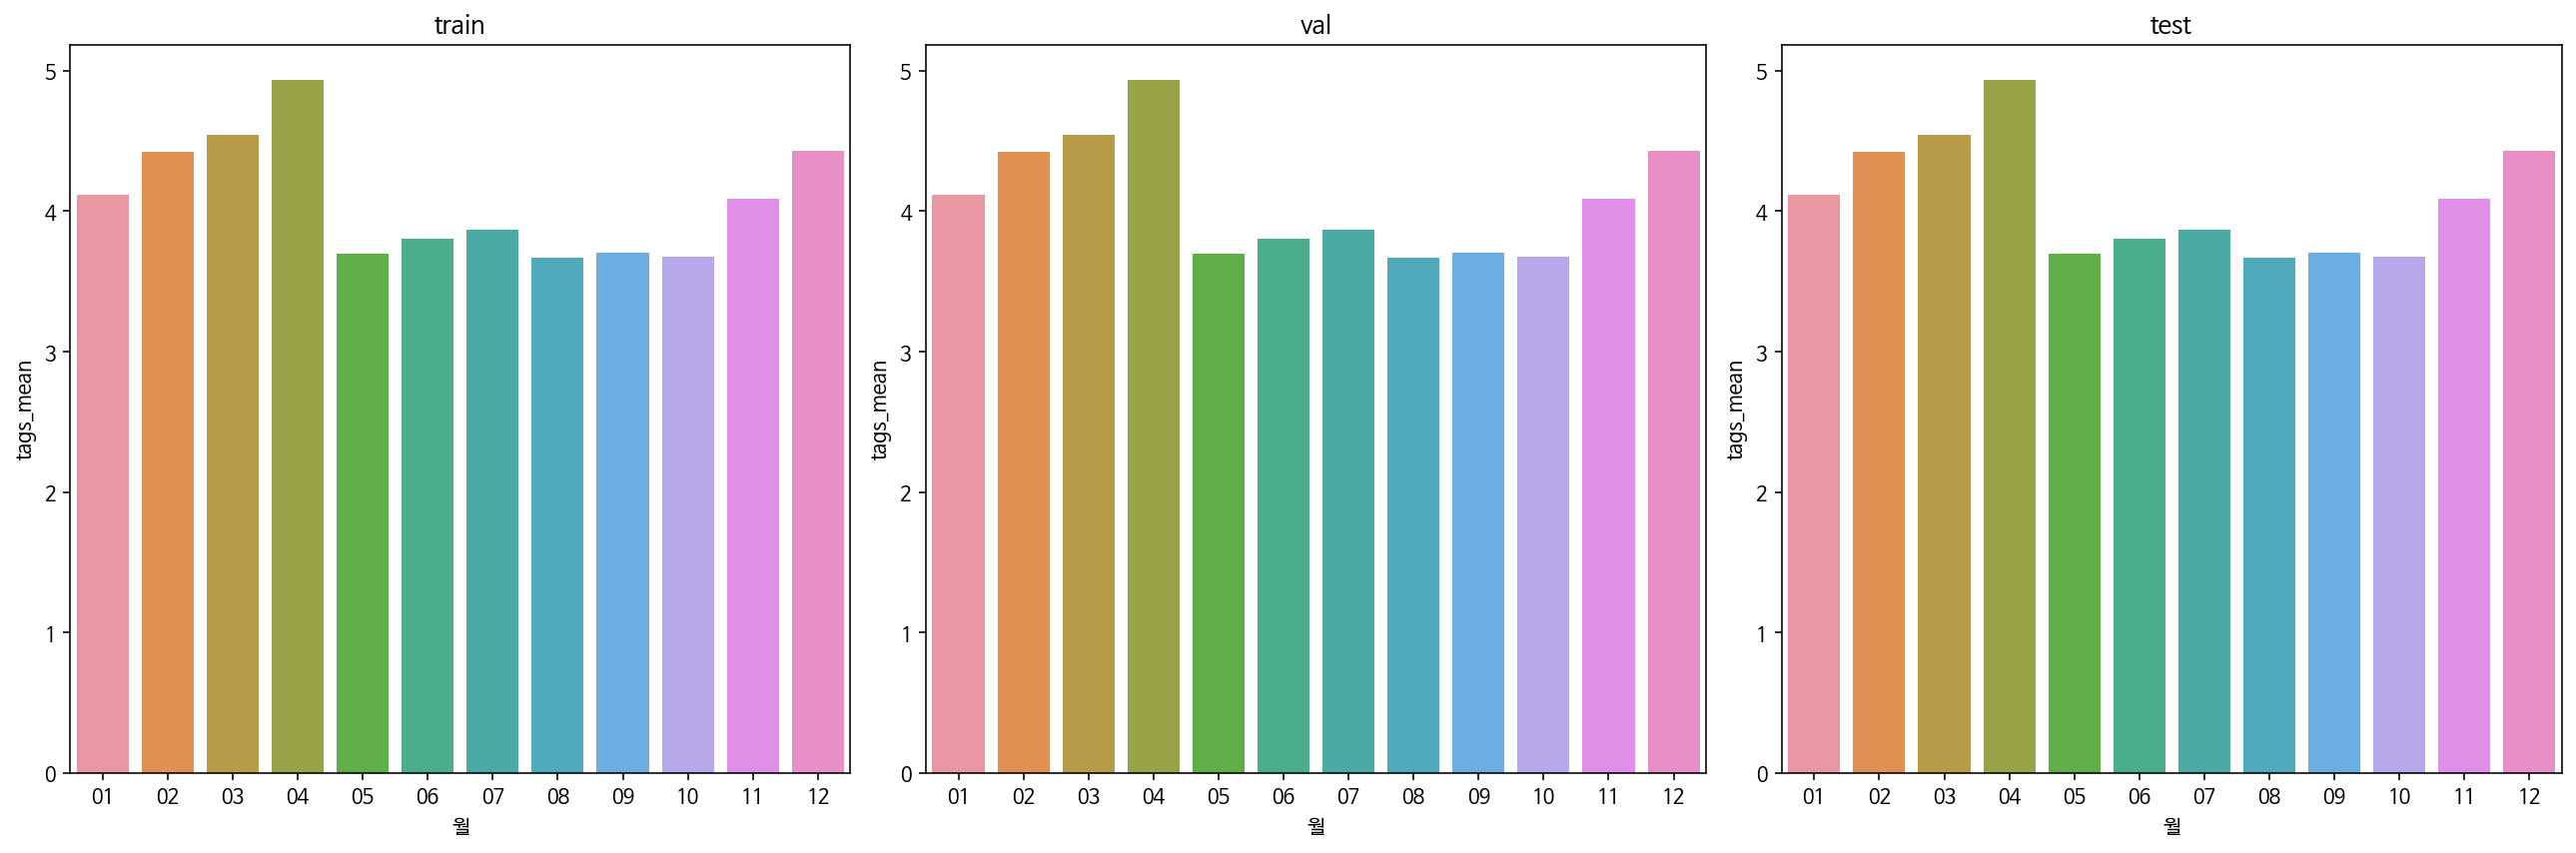

In [131]:
fig,((ax1,ax2,ax3))= plt.subplots(nrows=1,ncols=3, figsize = (18,6))
sns.barplot('월','tags_mean',data=mean_train_m,ax=ax1)
sns.barplot('월','tags_mean',data=mean_val_m,ax=ax2)
sns.barplot('월','tags_mean',data=mean_test_m,ax=ax3)

ax1.set_title('train')
ax2.set_title('val')
ax3.set_title('test')

plt.tight_layout()
plt.show()

4월이 tag의 개수도 많아 보임. 하지만 전체적인 월별 tag의 개수는 전체적으로 비슷한 것으로 보임. 
- 4월에 노래추천이나 플레이리스트에 관한 이벤트가 있는지 찾아보는 것이 좋을 듯.

----

# 변수 생성 방식 Thinking (To be next)
1. song_meta의 issue_data(발매일)의 년도와 월?(계절의 속성을 나타낼 수 있음)을 이용하여 data들(train,val,test)의 플레이리스트들 안에 있는 노래들(노래명,아티스트,장르)의 년도와 월과의 관계를 조사해 볼 필요가 있을 것 같음.
2. 그리고 플레이리스트에 들어가 있는 곡들의 빈도수를 뽑아서 연도별, 월별 순위표(노래,아티스트,장르)를 만들 필요가 있을 것 같음.